In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook


In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *

## Dataset Setup

In [7]:
pretrained = True
freeze = False
num_classes = 200
num_attributes = 13
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False

In [8]:
BASE_DIR = ""
data_dir_small = "../cem/cem/CUB_small/preprocessed/"
data_dir_blur = "../cem/cem/CUB_blur/preprocessed/"
data_dir_tag = "../cem/cem/CUB_tag/preprocessed/"

In [9]:
train_data_path = os.path.join(BASE_DIR, data_dir_small, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [10]:
train_loader_small = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path)
val_loader_small = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
During init self.transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizo

In [11]:
train_data_path = os.path.join(BASE_DIR, data_dir_blur, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [12]:
train_loader_blur = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path)
val_loader_blur = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
During init self.transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizo

In [13]:
train_data_path = os.path.join(BASE_DIR, data_dir_tag, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [14]:
train_loader_tag = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path)
val_loader_tag = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)

Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
During init self.transform is Compose(
    ColorJitter(brightness=[0.8745098039215686, 1.1254901960784314], contrast=None, saturation=(0.5, 1.5), hue=None)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
    RandomHorizo

## Load models

In [16]:
joint_location_small = "ConceptBottleneck/results/CUB_small/joint/best_model_42.pth"
joint_model_small = torch.load(joint_location_small,map_location=torch.device('cpu'))

In [17]:
for i in val_loader_small:
    x,y,c = i
    y_pred, c_pred = run_joint_model(joint_model_small,x)
    break

Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Compose(
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
)
Transforming! Co

In [18]:
accuracy = sum(logits_to_index(y_pred) == y)/len(y)
accuracy

tensor(1.)

In [19]:
y

tensor([ 8,  8,  0,  4,  2, 10, 11,  3,  7,  4,  7,  6,  1, 10,  7,  8, 11,  3,
         1,  8,  2,  5,  9,  4,  4, 10,  4,  7,  9,  9,  0,  8,  3,  9,  6,  3,
         2, 11,  8,  1,  8,  9,  1,  1,  2,  1, 11,  2,  5,  9,  9,  1,  0, 10,
         5,  8,  0,  2,  4,  7,  9,  3,  3, 10])

In [20]:
concept_location_blur = "ConceptBottleneck/results/CUB_blur/independent/concept/best_model_42.pth"
concept_model_blur = torch.load(concept_location_blur,map_location=torch.device('cpu'))

In [21]:
independent_location_blur = "ConceptBottleneck/results/CUB_blur/independent/bottleneck/best_model_42.pth"
independent_model_blur = torch.load(independent_location_blur,map_location=torch.device('cpu'))

In [25]:
y_pred, c_pred = run_independent_model([concept_model_blur,independent_model_blur],x)

In [26]:
accuracy = sum(logits_to_index(y_pred) == y)/len(y)
accuracy

tensor(0.9531)

In [27]:
logits_to_index(y_pred)[logits_to_index(y_pred) != y]

tensor([3, 3, 3])

## Spurious Scores

In [37]:
train_data_path = os.path.join(BASE_DIR, data_dir_small, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [38]:
val_loader_small_raw = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path,get_raw=True)

In [39]:
for i in val_loader_small_raw:
    x,y,c = i
    
    break

In [41]:
x[0]

tensor([[[0.4980, 0.5098, 0.5333,  ..., 0.4078, 0.4431, 0.4980],
         [0.4824, 0.4980, 0.4941,  ..., 0.4196, 0.4471, 0.4824],
         [0.4863, 0.4902, 0.4549,  ..., 0.4314, 0.4314, 0.4549],
         ...,
         [0.4078, 0.4510, 0.4588,  ..., 0.5529, 0.6627, 0.6431],
         [0.4627, 0.4275, 0.3608,  ..., 0.3451, 0.4157, 0.5529],
         [0.4000, 0.3569, 0.7804,  ..., 0.3451, 0.3529, 0.4353]],

        [[0.4980, 0.5098, 0.5373,  ..., 0.4510, 0.4863, 0.5255],
         [0.4824, 0.4980, 0.4941,  ..., 0.4549, 0.4824, 0.5098],
         [0.4863, 0.4824, 0.4549,  ..., 0.4588, 0.4588, 0.4863],
         ...,
         [0.3686, 0.3922, 0.3961,  ..., 0.5843, 0.6902, 0.6706],
         [0.4157, 0.4039, 0.2941,  ..., 0.3765, 0.4431, 0.5843],
         [0.3725, 0.4157, 0.7804,  ..., 0.3686, 0.3725, 0.4588]],

        [[0.4902, 0.5020, 0.5176,  ..., 0.5216, 0.5569, 0.5961],
         [0.4824, 0.4980, 0.4863,  ..., 0.5216, 0.5490, 0.5725],
         [0.4784, 0.4863, 0.4471,  ..., 0.5216, 0.5216, 0.

<IPython.core.display.Javascript object>


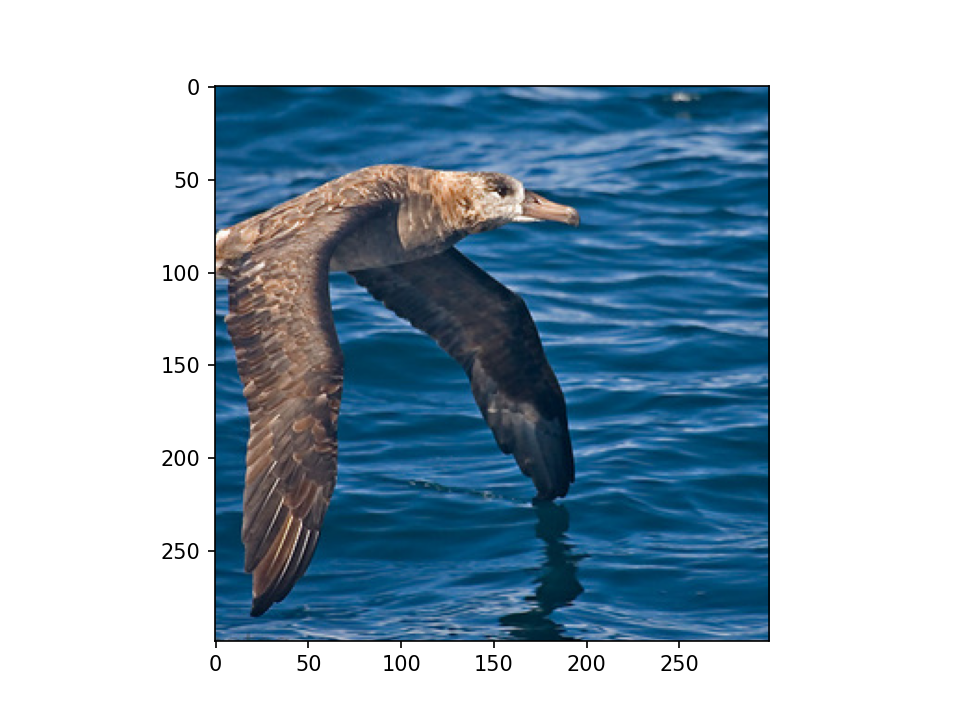

In [42]:
plt.imshow(x[2].permute(1, 2, 0).numpy())

In [47]:
transforms.ToTensor()(add_blur_array(transforms.ToPILImage()(x[0])))

tensor([[[0.4980, 0.5098, 0.5333,  ..., 0.4078, 0.4431, 0.4980],
         [0.4824, 0.4980, 0.4941,  ..., 0.4196, 0.4471, 0.4824],
         [0.4863, 0.4902, 0.4549,  ..., 0.4314, 0.4314, 0.4549],
         ...,
         [0.4549, 0.4549, 0.4588,  ..., 0.5529, 0.6627, 0.6431],
         [0.4627, 0.4627, 0.4667,  ..., 0.3451, 0.4157, 0.5529],
         [0.4706, 0.4706, 0.4706,  ..., 0.3451, 0.3529, 0.4353]],

        [[0.4980, 0.5098, 0.5373,  ..., 0.4510, 0.4863, 0.5255],
         [0.4824, 0.4980, 0.4941,  ..., 0.4549, 0.4824, 0.5098],
         [0.4863, 0.4824, 0.4549,  ..., 0.4588, 0.4588, 0.4863],
         ...,
         [0.4157, 0.4157, 0.4157,  ..., 0.5843, 0.6902, 0.6706],
         [0.4275, 0.4275, 0.4275,  ..., 0.3765, 0.4431, 0.5843],
         [0.4353, 0.4353, 0.4353,  ..., 0.3686, 0.3725, 0.4588]],

        [[0.4902, 0.5020, 0.5176,  ..., 0.5216, 0.5569, 0.5961],
         [0.4824, 0.4980, 0.4863,  ..., 0.5216, 0.5490, 0.5725],
         [0.4784, 0.4863, 0.4471,  ..., 0.5216, 0.5216, 0.

In [48]:
score = spurious_score([concept_model_blur,independent_model_blur],run_independent_model,'blur',val_loader_small_raw,0)

tensor([ 3,  8,  4,  2, 10, 11,  3,  7,  4,  7,  6,  1, 10,  7,  8, 11,  3,  1,
         3,  2,  5,  9,  4,  4, 10,  4,  7,  9,  9,  8,  3,  9,  6,  3,  2, 11,
         8,  1,  8,  9,  1,  1,  2,  1, 11,  2,  5,  9,  9,  1, 10,  5,  8,  2,
         4,  7,  9,  3,  3, 10]) 0
tensor([4, 2, 1, 7, 8]) 0


In [49]:
score

tensor(0.)

In [50]:
score = spurious_score(joint_model_small,run_joint_model,'blur',val_loader_small,0)

tensor([ 4, 11,  5,  6,  4, 11,  3,  0,  4,  7,  4,  4,  8,  7,  5, 11,  9,  7,
         8,  1,  5, 11,  4,  4,  9,  4,  9, 10, 10, 10,  6,  2,  1,  3,  1, 11,
         6,  4,  0,  2,  0,  1,  7,  1, 11,  2,  4,  9,  9,  9, 10,  5,  9,  5,
         4,  2, 11,  4,  3, 10]) 0
tensor([4, 8, 1, 7, 6]) 0


In [51]:
score

tensor(0.0462)